# Tutorial 4 -- eg2g19

## Task 1: Solving differential equation of system of reactions

$\frac{\delta X}{\delta t}=1-2.04X+{0.02X}^2Y$ <br><br> 
$\newline$
$\newline$
$\frac{\delta Y}{\delta t}=2X-0.02X^2Y$



## Task 2: Solve differential equation

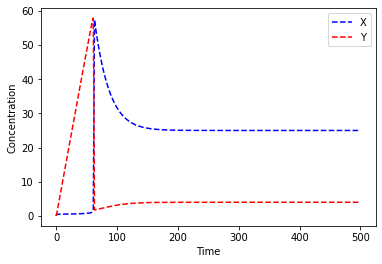

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(c,t):
    x = c[0]
    y = c[1]
    dxdt = 1 - (2.04 * x) + (0.02 * x * x * y)
    dydt = (2 * x) - (0.02 * x * x * y)
    return [dxdt, dydt]

t = np.linspace(0, 500, 500)
y = odeint(f, [0,0], t)

# plot the results
plt.figure(1)
plt.plot(t,y[:,0],'b--')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend(['X','Y'])
plt.show()

Concentration of Y increases relatively quickly initialy due to any X forming being turned into Y. Until Y passes a concentration threshold of approximately 55, it begins interacting with X, after which the concentration of X becomes very high as a result of the X^2 factor. At this point, the concentration of Y rapidly drops to near 0 as the increased X concentration converts the Y into X, before Y stabalises at approximately 5. The concentration of X increases to just shy of 60 before dropping and stabalising at approximately 25. X and Y remain at equilibrium at approximately 25 and 5 respectively. The graph indicates that the molecule X is used to suppress the production of Y. 

## Task 3: Gillespie algorithm

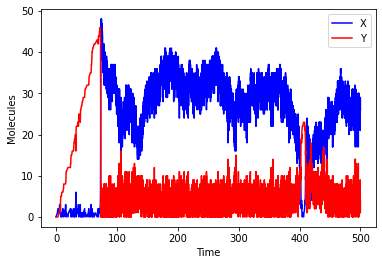

In [13]:
import random as r
import math

def init():
    pass

def reaction1():
    mol["X"] += 1

def reaction2():
    mol["X"] -= 1
    mol["Y"] += 1

def reaction3():
    mol["X"] -= 2
    mol["Y"] -= 1
    mol["X"] += 3

def reaction4():
    mol["X"] -= 1
    
def addChange(t):
    countAtT.append([t, mol["X"], mol["Y"]])
    
def getWeightsTotal():
    w = [1, 
         2 * mol['X'], 
         0.02 * ((mol['X'] * mol['X']) * mol['Y']), 
         0.04 * mol['X']]
    wT = sum(w)
    return wT

def getWeights():
    w = [1, 
         2 * mol['X'], 
         0.02 * ((mol['X'] * mol['X']) * mol['Y']), 
         0.04 * mol['X']]
    wT = sum(w)
    return [wi/wT for wi in w]

reactions = [reaction1, reaction2, reaction3, reaction4]
molecules = ["X", "Y"]
mol = {z : 0 for z in molecules}

countAtT = []
T = 500
t = 0
dt = 0

next_reaction = init
while t < T:
    dt = -math.log(r.uniform(0.0, 0.5)) / getWeightsTotal()
    next_reaction()
    next_reaction = r.choices(population = reactions, weights = getWeights(), k = 1)[0]
    addChange(t)
    t = t + dt
    
plt.plot([x[0] for x in countAtT], [x[1] for x in countAtT], 'b-')
plt.plot([x[0] for x in countAtT], [x[2] for x in countAtT], 'r-')
plt.ylabel('Molecules')
plt.xlabel('Time')
plt.legend(['X','Y'])
plt.show()

Again, here we can see the concentration of Y increasing relatively quickly until it comes into contact with X and rapidly decreases to close to zero. The concentration of X shoots up at this point. The randomness used in the program results in fluctuations in concentrations of X and Y, but the trend of X remaing larger than Y holds. <br>
$\newline$
Occasionally, when the algorithm is run, the concentration of X drops, alowing Y to shoot up before quickly rebalancing at the equillibrium state. This is seen at Time=400.